In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
directory = '/Users/mrinaalarora/Downloads/Spotify Extended Streaming History'
dataframes = []

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        df = pd.read_json(filepath)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_json('spotify_data.json', orient='records', lines=True)

In [ ]:
my_data = pd.read_json('data/spotify_data.json',lines=True)
my_data

In [ ]:
# Data Preparation and Cleaning
relevant_columns = [ "ts", "platform", "ms_played", "conn_country", "master_metadata_track_name", "master_metadata_album_artist_name", "master_metadata_album_album_name", "shuffle", "skipped", "offline", "incognito_mode" ]
spotify_stream_df = my_data[relevant_columns]
spotify_stream_df # to read all the dataframe at once

In [ ]:
# Number of unique artists
unique_artists = spotify_stream_df['master_metadata_album_artist_name'].nunique()
print(f"Number of unique artists: {unique_artists}")

In [ ]:
# Number of unique tracks
unique_tracks = spotify_stream_df['master_metadata_track_name'].nunique()
print(f"Number of unique tracks: {unique_tracks}")

In [ ]:
# Converting 'ts' to datetime
spotify_stream_df['Play-Time'] = pd.to_datetime(spotify_stream_df['ts'])

# Extract year, month, day, weekday, time, hour, day_name
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())

# Add Count column
spotify_stream_df['Count'] = 1

# Convert milliseconds played to timedeltas
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["ms_played"], unit='ms')

# Functions to extract hours and minutes from timedeltas
def hours(td):
    '''To get the hour information'''
    return td.seconds / 3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds / 60) % 60

# Apply functions to extract listening time in hours and minutes
spotify_stream_df["Listening Time (Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time (Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)
spotify_stream_df.sample(3)

In [ ]:
columns_to_drop = ['ts','ms_played','Time-Played (hh-mm-ss)']
spotify_stream_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display a sample of the DataFrame to verify the correct columns have been removed
spotify_stream_df

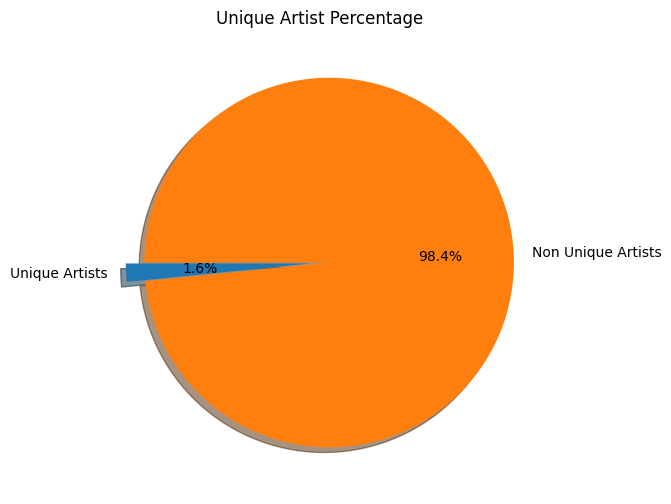

Number of unique artists: 1624
Total number of artist entries: 101943
Percentage of unique artists: 1.59%


In [26]:
# Percentage of Unique Artists

unique_artists = spotify_stream_df["master_metadata_album_artist_name"].nunique()
total_artists = spotify_stream_df["master_metadata_album_artist_name"].count()
unique_artist_percentage = (unique_artists / total_artists) * 100

# Prepare data for the pie chart
unique_artist_list = np.array([unique_artists, total_artists - unique_artists])
unique_artist_list_labels = ["Unique Artists", "Non Unique Artists"]

# Create a pie chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(unique_artist_list, labels=unique_artist_list_labels, autopct='%1.1f%%', explode=[0.05, 0.05], startangle=180, shadow=True)
plt.title("Unique Artist Percentage")
plt.show()

# Print the calculated percentages for reference
print(f"Number of unique artists: {unique_artists}")
print(f"Total number of artist entries: {total_artists}")
print(f"Percentage of unique artists: {unique_artist_percentage:.2f}%")